# Data Collection Phase

In this phase , data is collected from various social media sites like Twitter and Reddit.

## 1. Collecting Data from Twitter using tweepy API

In [7]:
import tweepy
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
import twitter_credentials
import numpy as np
import pandas as pd
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        #df['id'] = np.array([tweet.id for tweet in tweets])
        #df['len'] = np.array([len(tweet.text) for tweet in tweets])
        #df['date'] = np.array([tweet.created_at for tweet in tweets])
        #df['source'] = np.array([tweet.source for tweet in tweets])
        #df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        #df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    #tweets = api.user_timeline(screen_name="AUSvIND", count=500)
    input_string = input("Enter hashtags separated by space ")
    usertags = input_string.split()
    search_words = usertags

    date_since = "2020-01-01"

    tweets = tweepy.Cursor(api.search, search_words,
                       geocode="20.5937,78.9629,3000km",
                       lang="en", since=date_since).items(100)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(100))
    #df.to_pickle('tweets.pkl')
    df.to_csv('twitterdata.csv')

Enter hashtags separated by space #INDvsAUS #indvsaus
                                               Tweets
0   RT @ysjagan: Kudos to the Indian Women's Crick...
1   RT @vlp1994: KL Rahul misses the ball \n\nCrow...
2   @ICC Best of luck both team \n\nI can't wait f...
3   #cricket #INDvAUS #AUSvIND 'Guys Come Out Here...
4   Lyon rates India-Oz series at par with Ashes, ...
5   New Video Out Now. Please check it out.\n👇👇👇👇👇...
6   Yup! It's level is now comparable with Ashes!!...
7   RT @toisports: .@NathLyon421 rates India-Austr...
8   RT @toisports: .@NathLyon421 rates India-Austr...
9   RT @toisports: .@NathLyon421 rates India-Austr...
10  RT @toisports: .@NathLyon421 rates India-Austr...
11  RT @toisports: .@NathLyon421 rates India-Austr...
12  .@NathLyon421 rates India-Australia series as ...
13  RT @ITGDsports: "Most players tend to forget t...
14  RT @ITGDsports: "Most players tend to forget t...
15  RT @ITGDsports: "Most players tend to forget t...
16  "Most players tend to fo

## 2. Collecting data from Reddit using Praw API

In [8]:
import praw
import pandas as pd
from praw.models import MoreComments
reddit = praw.Reddit(client_id='MjOYmV5QB4Q8bw', client_secret='Ha-Bem-WhpBXOFu6sQExGW1u760', user_agent='Scraping Example')

"""
# get 10 hot posts from the MachineLearning subreddit
hot_posts = reddit.subreddit('Cricket').hot(limit=10)
for post in hot_posts:
    print(post.title)
"""
#comments = []
comments=""
threadid = input("Enter Reddit Thread id:")
submission = reddit.submission(id=threadid)
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    comments = comments + top_level_comment.body
    #comments.append([top_level_comment.body])
#comments = pd.DataFrame(comments,columns=['comment'])
print(comments)
#comments.to_pickle('redditdataset.pkl')
comments.to_csv('redditdataset.csv', sep='.', encoding='utf-8', index=False)
#f1zmjl

Enter Reddit Thread id:f1zmjl
So this is the worst series of Kohli like in years.Saini ODI average at 53 😂SANTNER OVERRATED

NEESHAM OUTDATED

LONG HAVE WE AWAITED

LE BIG MAN HAS BEEN ACTIVATEDKohli running with Shaw is going to be interesting.

Edit: Oh my god![deleted]New bowler : *exists*

India : I am about to make this man's whole career.Fuck i'm excited for the future of long levers Jamieson. A handful to face and his cameo innings was no fluke he can swing the blade. Hit a century belting the piss out of a near full strength English bowling unit in a warm up. [Source](https://www.stuff.co.nz/sport/cricket/102273999/kyle-jamieson-gets-under-englands-skin-on-his-way-to-smashing-surreal-century)LOL Doull saying you need to post it on Twitter if you want Neesham to read itSaini was refusing the single due to his humbleness. He didn't want to show off his skills.NZ chasing down 300 when Taylor and Williamson score less than 40 combined makes me super happy.**Fastest fifty against In

AttributeError: 'str' object has no attribute 'to_csv'

# Data Processing Phase

Performing data mining algorithms on collected data to retrieve information.



## Applying TF-IDF to collected dataset

In [9]:
with open('twitterdata.csv', 'r') as twitterfile:
    twittertext = twitterfile.readlines()
# Converting List to String
twitterdata = ' '.join(map(str, twittertext))
#print(twitterdata)

In [10]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
ttokenized_text=sent_tokenize(twitterdata)
ttokenized_word=word_tokenize(twitterdata)

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/warlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
twitterfilter = []
for w in ttokenized_word:
    if w not in stop_words:
        twitterfilter.append(w)
td = ' '.join(map(str, twitterfilter))

In [13]:
import re
two = re.findall(r'\w+', td)
tdi = [i for i in two if not i.isdigit()]
tw = [i for i in tdi if len(i) > 3]
twitterdoc = ' '.join(map(str, tw))

In [14]:
with open('redditdataset.csv', 'r') as redditfile:
    reddittext = redditfile.readlines()
# Converting List to String
redditdata = ' '.join(map(str, reddittext))

In [15]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
tokenized_text=sent_tokenize(redditdata)
tokenized_word=word_tokenize(redditdata)

In [16]:
redditfilter = []
for w in tokenized_word:
    if w not in stop_words:
        redditfilter.append(w)
rd = ' '.join(map(str, redditfilter))

In [17]:
import re
rwo = re.findall(r'\w+', rd)
rdi = [i for i in rwo if not i.isdigit()]
fw = [i for i in rdi if len(i) > 3]
redditdoc = ' '.join(map(str, fw))

In [18]:
str_one, str_two = redditdoc[:len(redditdoc)//2],redditdoc[len(redditdoc)//2:] 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [20]:
response = tfidf.fit_transform([str_one, str_two])

In [21]:
tfidfwords = []
feature_names = tfidf.get_feature_names()
for col in response.nonzero()[1]:
    if not feature_names[col].isdigit() and len(feature_names[col]) > 3 and int((response[0, col]) * 100) % 10 != 0:
        print (feature_names[col], ' - ', response[0, col])
        case = {'word': feature_names[col], 'score': response[0, col] }
        tfidfwords.append(case)        

pig2  -  0.013761054704880033
definitely  -  0.013761054704880033
origin  -  0.013761054704880033
punjabi  -  0.04128316411464009
khrriya  -  0.013761054704880033
kidhar  -  0.013761054704880033
retire  -  0.013761054704880033
grandpa  -  0.013761054704880033
eternity  -  0.013761054704880033
whine  -  0.013761054704880033
afghanistan  -  0.013761054704880033
teams  -  0.013761054704880033
lowest  -  0.013761054704880033
individual  -  0.013761054704880033
looked  -  0.013761054704880033
syllabus  -  0.013761054704880033
championship  -  0.013761054704880033
preparation  -  0.013761054704880033
concentration  -  0.013761054704880033
rayudu  -  0.013761054704880033
ambati  -  0.013761054704880033
scooby  -  0.013761054704880033
spanner  -  0.013761054704880033
toes  -  0.027522109409760066
powerful  -  0.013761054704880033
gaandu  -  0.013761054704880033
ground  -  0.013761054704880033
bloke  -  0.013761054704880033
stand  -  0.027522109409760066
reserve  -  0.013761054704880033
basin  

bothered  -  0.013761054704880033
knuckleball  -  0.013761054704880033
delivery  -  0.013761054704880033
bhenchod  -  0.013761054704880033
excellent  -  0.0195822075204744
what  -  0.0195822075204744
wakes  -  0.013761054704880033
international  -  0.029373311280711602
language  -  0.013761054704880033
speaks  -  0.013761054704880033
player  -  0.0195822075204744
kannadigas  -  0.013761054704880033
three  -  0.06880527352440016
means  -  0.0195822075204744
roots  -  0.013761054704880033
mangalore  -  0.013761054704880033
also  -  0.0195822075204744
right  -  0.048955518801186
vettori  -  0.013761054704880033
bespectacled  -  0.013761054704880033
oram  -  0.013761054704880033
handed  -  0.013761054704880033
left  -  0.05504421881952013
tall  -  0.027522109409760066
patel  -  0.013761054704880033
jeetan  -  0.013761054704880033
continent  -  0.013761054704880033
spinner  -  0.027522109409760066
must  -  0.013761054704880033
kind  -  0.013761054704880033
decided  -  0.013761054704880033
b

reassuring  -  0.013761054704880033
ball  -  0.097911037602372
great  -  0.0783288300818976
shit  -  0.0391644150409488
hate  -  0.013761054704880033
they  -  0.058746622561423205
highlights  -  0.013761054704880033
final  -  0.04128316411464009
world  -  0.0783288300818976
playing  -  0.06853772632166041
irrespective  -  0.013761054704880033
contribution  -  0.013761054704880033
minimal  -  0.013761054704880033
dhawan  -  0.0195822075204744
rohit  -  0.0391644150409488
matches  -  0.0195822075204744
scores  -  0.048955518801186
dammm  -  0.013761054704880033
fucking  -  0.048955518801186
recognises  -  0.013761054704880033
decision  -  0.013761054704880033
life  -  0.0195822075204744
bros  -  0.0195822075204744
together  -  0.04128316411464009
play  -  0.029373311280711602
boys  -  0.029373311280711602
karnataka  -  0.04128316411464009
trophy  -  0.027522109409760066
lift  -  0.013761054704880033
back  -  0.097911037602372
came  -  0.013761054704880033
sodhi  -  0.0195822075204744
rat

In [22]:
#sorting the list in ascending order , taking the word value and reversing the final list
tfsorted = []
words = []
tfsorted = sorted(tfidfwords, key = lambda i: i['score']) 
#print(tfsorted)
words = [d['word'] for d in tfsorted]
words.reverse()
#making list distinct
from collections import OrderedDict
asp = list(dict.fromkeys(words))
asp = [x for x in asp if x != 'https']

In [24]:
fdt = redditdata
wlist = asp[:10]
fdt = fdt.replace("Bumrah", "bumrah")

In [25]:
fre = []
for i in wlist:
    dl = []
    for sentence in fdt.split('.'):
        if i in sentence:
                dl.append(sentence + '.')
    fre.append(dl)

In [34]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from ipywidgets import Layout

In [114]:
def buttondisp():
    tw1.layout.display = 'none'
    tw2.layout.display = 'none'
    tw3.layout.display = 'none'
    tw4.layout.display = 'none'
    tw5.layout.display = 'none'
    tw6.layout.display = 'none'
    tw7.layout.display = 'none'
    tw8.layout.display = 'none'
    tw9.layout.display = 'none'
    tw10.layout.display = 'none'
    

tw1 = widgets.Button(
description=asp[0],
disabled=False,
icon=''
)

tw1out = widgets.Output()
def tw1clicked(_):
    with tw1out:
        clear_output()
        rd = ' '.join(map(str, fre[0][:5]))
        buttondisp()
        print("Top comments about :",asp[0],"\n")
        print(rd)
            
tw1.on_click(tw1clicked)

tw2 = widgets.Button(
description=asp[1],
disabled=False,
icon=''
)

tw2out = widgets.Output()
def tw2clicked(_):
    with tw2out:
        clear_output()
        rd = ' '.join(map(str, fre[1][:5]))
        buttondisp()
        print("Top comments about :",asp[1],"\n")
        print(rd)
            
tw2.on_click(tw2clicked)


tw3 = widgets.Button(
description=asp[2],
disabled=False,
icon=''
)

tw3out = widgets.Output()
def tw3clicked(_):
    with tw3out:
        clear_output()
        rd = ' '.join(map(str, fre[2][:5]))
        buttondisp()
        print("Top comments about :",asp[2],"\n")
        print(rd)
            
tw3.on_click(tw3clicked)



tw4 = widgets.Button(
description=asp[3],
disabled=False,
icon=''
)

tw4out = widgets.Output()
def tw4clicked(_):
    with tw4out:
        clear_output()
        rd = ' '.join(map(str, fre[3][:5]))
        buttondisp()
        print("Top comments about :",asp[3],"\n")
        print(rd)
            
tw4.on_click(tw4clicked)


tw5 = widgets.Button(
description=asp[4],
disabled=False,
icon=''
)

tw5out = widgets.Output()
def tw5clicked(_):
    with tw5out:
        clear_output()
        rd = ' '.join(map(str, fre[4][:5]))
        buttondisp()
        print("Top comments about :",asp[4],"\n")
        print(rd)
            
tw5.on_click(tw5clicked)


tw6 = widgets.Button(
description=asp[5],
disabled=False,
icon=''
)

tw6out = widgets.Output()
def tw6clicked(_):
    with tw6out:
        clear_output()
        rd = ' '.join(map(str, fre[5][:5]))
        buttondisp()
        print("Top comments about :",asp[5],"\n")
        print(rd)
            
tw6.on_click(tw6clicked)

tw7 = widgets.Button(
description=asp[6],
disabled=False,
icon=''
)

tw7out = widgets.Output()
def tw7clicked(_):
    with tw7out:
        clear_output()
        rd = ' '.join(map(str, fre[6][:5]))
        buttondisp()
        print("Top comments about :",asp[6],"\n")
        print(rd)
            
tw7.on_click(tw7clicked)

tw8 = widgets.Button(
description=asp[7],
disabled=False,
icon=''
)

tw8out = widgets.Output()
def tw8clicked(_):
    with tw8out:
        clear_output()
        rd = ' '.join(map(str, fre[7][:5]))
        buttondisp()
        print("Top comments about :",asp[7],"\n")
        print(rd)
            
tw8.on_click(tw8clicked)


tw9 = widgets.Button(
description=asp[8],
disabled=False,
icon=''
)

tw9out = widgets.Output()
def tw9clicked(_):
    with tw9out:
        clear_output()
        rd = ' '.join(map(str, fre[8][:5]))
        buttondisp()
        print("Top comments about :",asp[8],"\n")
        print(rd)
            
tw9.on_click(tw9clicked)


tw10 = widgets.Button(
description=asp[9],
disabled=False,
icon=''
)

tw10out = widgets.Output()
def tw10clicked(_):
    with tw10out:
        clear_output()
        rd = ' '.join(map(str, fre[9][:5]))
        buttondisp()
        print("Top comments about :",asp[9],"\n")
        print(rd)
            
tw10.on_click(tw10clicked)


print("Fans mostly talked about:")
vtpcomm = widgets.HBox([tw1,tw1out,tw2,tw2out,tw3,tw3out,tw4,tw4out,tw5,tw5out,tw6,tw6out,tw7,tw7out,tw8,tw8out,tw9,tw9out,tw10,tw10out])
vtpcomm

Fans mostly talked about:


## Applying K-Means Clustering on Dataset

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [147]:
#combining reddit and twitter data
finaldatatext = fw

In [148]:
#making the list distinct for processing
finaldatatext = list(set(finaldatatext))
len(finaldatatext)

1671

In [149]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(finaldatatext)

In [150]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [151]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [152]:
clusterlists = []
for i in range(true_k):
    dummy_list  = []
    for ind in order_centroids[i]:
        #print( '%s' % terms[ind])
        dummy_list.append('%s' % terms[ind])
    clusterlists.append(dummy_list)

In [153]:
btkeywords = ['bat', 'batting',]
bowkeywords = ['bowling', 'spinner','spin']
fieldkeywords = ['field','catch', 'fielding', 'keeper','hand']

In [154]:
#print(clusterlists[0])

## Domain Classification of three clusters into Batting , Bowling & Fielding

In [155]:
bt = []  
bw = []  
fd = []
for i in btkeywords:
    if i in btkeywords and i in clusterlists[0]:
        bt = clusterlists[0]
    elif i in btkeywords and i in clusterlists[1]:
        bt = clusterlists[1]
    else:
        bt = clusterlists[2]
#print("Top values of batting cluster : ",bt[:10])    

In [156]:
for i in bowkeywords:
    if i in bowkeywords and i in clusterlists[1]:
        bw = clusterlists[1]
    elif i in bowkeywords and i in clusterlists[0]:
        bw = clusterlists[0]
    else:
        bw = clusterlists[2]
#print("Top values of bowling cluster : ",bw[:10])

In [157]:
for i in fieldkeywords:
    if i in fieldkeywords and i in clusterlists[2]:
        fd = clusterlists[2]
    elif i in fieldkeywords and i in clusterlists[1]:
        fd = clusterlists[1]
    else:
        fd = clusterlists[0]
#print("Top values of fielding cluster :",fd[:10])

In [158]:
#print(bw)
bt = bt[:1000]
bw = bw[:1000]
#print(bw)
fd = fd[:1000]

## Sorting original TF-IDF values into three clusters

In [159]:
#clustering tf-idf values
bttfidf = []
for i in asp:
    if i in asp and i in bt:
        bttfidf.append(i)
#print("Top TF - IDF scores on batting ",bttfidf[:10])

In [160]:
btlist = bttfidf[:10]
qw = []
for i in btlist:
    er = []
    for sentence in fdt.split('.'):
        if i in sentence:
                er.append(sentence + '.')
    qw.append(er)

In [161]:
#jk = ' '.join(map(str, qw[6][:5]))
#print(jk)

In [162]:
def buttondisp():
    tw1.layout.display = 'none'
    tw2.layout.display = 'none'
    tw3.layout.display = 'none'
    tw4.layout.display = 'none'
    tw5.layout.display = 'none'
    tw6.layout.display = 'none'
    tw7.layout.display = 'none'
    tw8.layout.display = 'none'
    tw9.layout.display = 'none'
    tw10.layout.display = 'none'
    

tw1 = widgets.Button(
description=btlist[0],
disabled=False,
icon=''
)

tw1out = widgets.Output()
def tw1clicked(_):
    with tw1out:
        clear_output()
        jk = ' '.join(map(str, qw[0][:5]))
        buttondisp()
        print("Top comments about :",btlist[0],"\n")
        print(jk)
            
tw1.on_click(tw1clicked)

tw2 = widgets.Button(
description=btlist[1],
disabled=False,
icon=''
)

tw2out = widgets.Output()
def tw2clicked(_):
    with tw2out:
        clear_output()
        jk = ' '.join(map(str, qw[1][:5]))
        buttondisp()
        print("Top comments about :",btlist[1],"\n")
        print(jk)
            
tw2.on_click(tw2clicked)


tw3 = widgets.Button(
description=btlist[2],
disabled=False,
icon=''
)

tw3out = widgets.Output()
def tw3clicked(_):
    with tw3out:
        clear_output()
        jk = ' '.join(map(str, qw[2][:5]))
        buttondisp()
        print("Top comments about :",btlist[2],"\n")
        print(jk)
            
tw3.on_click(tw3clicked)



tw4 = widgets.Button(
description=btlist[3],
disabled=False,
icon=''
)

tw4out = widgets.Output()
def tw4clicked(_):
    with tw4out:
        clear_output()
        jk = ' '.join(map(str, qw[3][:5]))
        buttondisp()
        print("Top comments about :",btlist[3],"\n")
        print(jk)
            
tw4.on_click(tw4clicked)


tw5 = widgets.Button(
description=btlist[4],
disabled=False,
icon=''
)

tw5out = widgets.Output()
def tw5clicked(_):
    with tw5out:
        clear_output()
        jk = ' '.join(map(str, qw[4][:5]))
        buttondisp()
        print("Top comments about :",btlist[4],"\n")
        print(jk)
            
tw5.on_click(tw5clicked)


tw6 = widgets.Button(
description=btlist[5],
disabled=False,
icon=''
)

tw6out = widgets.Output()
def tw6clicked(_):
    with tw6out:
        clear_output()
        jk = ' '.join(map(str, qw[5][:5]))
        buttondisp()
        print("Top comments about :",btlist[5],"\n")
        print(jk)
            
tw6.on_click(tw6clicked)

tw7 = widgets.Button(
description=btlist[6],
disabled=False,
icon=''
)

tw7out = widgets.Output()
def tw7clicked(_):
    with tw7out:
        clear_output()
        jk = ' '.join(map(str, qw[6][:5]))
        buttondisp()
        print("Top comments about :",btlist[6],"\n")
        print(jk)
            
tw7.on_click(tw7clicked)

tw8 = widgets.Button(
description=btlist[7],
disabled=False,
icon=''
)

tw8out = widgets.Output()
def tw8clicked(_):
    with tw8out:
        clear_output()
        jk = ' '.join(map(str, qw[7][:5]))
        buttondisp()
        print("Top comments about :",btlist[7],"\n")
        print(jk)
            
tw8.on_click(tw8clicked)


tw9 = widgets.Button(
description=btlist[8],
disabled=False,
icon=''
)

tw9out = widgets.Output()
def tw9clicked(_):
    with tw9out:
        clear_output()
        jk = ' '.join(map(str, qw[8][:5]))
        buttondisp()
        print("Top comments about :",btlist[8],"\n")
        print(jk)
            
tw9.on_click(tw9clicked)


tw10 = widgets.Button(
description=btlist[9],
disabled=False,
icon=''
)

tw10out = widgets.Output()
def tw10clicked(_):
    with tw10out:
        clear_output()
        jk = ' '.join(map(str, qw[9][:5]))
        buttondisp()
        print("Top comments about :",btlist[9],"\n")
        print(jk)
            
tw10.on_click(tw10clicked)


print("Top Batting related Comments:")
vtpcomm = widgets.HBox([tw1,tw1out,tw2,tw2out,tw3,tw3out,tw4,tw4out,tw5,tw5out,tw6,tw6out,tw7,tw7out,tw8,tw8out,tw9,tw9out,tw10,tw10out])
vtpcomm

Top Batting related Comments:


In [163]:
bwtfidf = []
for i in asp:
    if i in asp and i in bw:
        bwtfidf.append(i)
#print("Top TF - IDF scores on bowling ",bwtfidf[:10])

In [164]:
btlist = bwtfidf[:10]
qw = []
for i in btlist:
    er = []
    for sentence in fdt.split('.'):
        if i in sentence:
                er.append(sentence + '.')
    qw.append(er)

In [165]:
def buttondisp():
    tw1.layout.display = 'none'
    tw2.layout.display = 'none'
    tw3.layout.display = 'none'
    tw4.layout.display = 'none'
    tw5.layout.display = 'none'
    tw6.layout.display = 'none'
    tw7.layout.display = 'none'
    tw8.layout.display = 'none'
    tw9.layout.display = 'none'
    tw10.layout.display = 'none'
    

tw1 = widgets.Button(
description=btlist[0],
disabled=False,
icon=''
)

tw1out = widgets.Output()
def tw1clicked(_):
    with tw1out:
        clear_output()
        jk = ' '.join(map(str, qw[0][:5]))
        buttondisp()
        print("Top comments about :",btlist[0],"\n")
        print(jk)
            
tw1.on_click(tw1clicked)

tw2 = widgets.Button(
description=btlist[1],
disabled=False,
icon=''
)

tw2out = widgets.Output()
def tw2clicked(_):
    with tw2out:
        clear_output()
        jk = ' '.join(map(str, qw[1][:5]))
        buttondisp()
        print("Top comments about :",btlist[1],"\n")
        print(jk)
            
tw2.on_click(tw2clicked)


tw3 = widgets.Button(
description=btlist[2],
disabled=False,
icon=''
)

tw3out = widgets.Output()
def tw3clicked(_):
    with tw3out:
        clear_output()
        jk = ' '.join(map(str, qw[2][:5]))
        buttondisp()
        print("Top comments about :",btlist[2],"\n")
        print(jk)
            
tw3.on_click(tw3clicked)



tw4 = widgets.Button(
description=btlist[3],
disabled=False,
icon=''
)

tw4out = widgets.Output()
def tw4clicked(_):
    with tw4out:
        clear_output()
        jk = ' '.join(map(str, qw[3][:5]))
        buttondisp()
        print("Top comments about :",btlist[3],"\n")
        print(jk)
            
tw4.on_click(tw4clicked)


tw5 = widgets.Button(
description=btlist[4],
disabled=False,
icon=''
)

tw5out = widgets.Output()
def tw5clicked(_):
    with tw5out:
        clear_output()
        jk = ' '.join(map(str, qw[4][:5]))
        buttondisp()
        print("Top comments about :",btlist[4],"\n")
        print(jk)
            
tw5.on_click(tw5clicked)


tw6 = widgets.Button(
description=btlist[5],
disabled=False,
icon=''
)

tw6out = widgets.Output()
def tw6clicked(_):
    with tw6out:
        clear_output()
        jk = ' '.join(map(str, qw[5][:5]))
        buttondisp()
        print("Top comments about :",btlist[5],"\n")
        print(jk)
            
tw6.on_click(tw6clicked)

tw7 = widgets.Button(
description=btlist[6],
disabled=False,
icon=''
)

tw7out = widgets.Output()
def tw7clicked(_):
    with tw7out:
        clear_output()
        jk = ' '.join(map(str, qw[6][:5]))
        buttondisp()
        print("Top comments about :",btlist[6],"\n")
        print(jk)
            
tw7.on_click(tw7clicked)

tw8 = widgets.Button(
description=btlist[7],
disabled=False,
icon=''
)

tw8out = widgets.Output()
def tw8clicked(_):
    with tw8out:
        clear_output()
        jk = ' '.join(map(str, qw[7][:5]))
        buttondisp()
        print("Top comments about :",btlist[7],"\n")
        print(jk)
            
tw8.on_click(tw8clicked)


tw9 = widgets.Button(
description=btlist[8],
disabled=False,
icon=''
)

tw9out = widgets.Output()
def tw9clicked(_):
    with tw9out:
        clear_output()
        jk = ' '.join(map(str, qw[8][:5]))
        buttondisp()
        print("Top comments about :",btlist[8],"\n")
        print(jk)
            
tw9.on_click(tw9clicked)


tw10 = widgets.Button(
description=btlist[9],
disabled=False,
icon=''
)

tw10out = widgets.Output()
def tw10clicked(_):
    with tw10out:
        clear_output()
        jk = ' '.join(map(str, qw[9][:5]))
        buttondisp()
        print("Top comments about :",btlist[9],"\n")
        print(jk)
            
tw10.on_click(tw10clicked)


print("Top Bowling related Comments:")
vtpcomm = widgets.HBox([tw1,tw1out,tw2,tw2out,tw3,tw3out,tw4,tw4out,tw5,tw5out,tw6,tw6out,tw7,tw7out,tw8,tw8out,tw9,tw9out,tw10,tw10out])
vtpcomm

Top Bowling related Comments:


In [166]:
fdtfidf = []
for i in asp:
    if i in asp and i in fd:
        fdtfidf.append(i)
print("Top TF - IDF scores on fielding ",fdtfidf[:10])

Top TF - IDF scores on fielding  ['series', 'india', 'kohli', 'bowling', 'cricket', 'bumrah', 'thakur', 'wickets', 'team', 'ball']


In [167]:
btlist = fdtfidf[:10]
qw = []
for i in btlist:
    er = []
    for sentence in fdt.split('.'):
        if i in sentence:
                er.append(sentence + '.')
    qw.append(er)

In [169]:
def buttondisp():
    tw1.layout.display = 'none'
    tw2.layout.display = 'none'
    tw3.layout.display = 'none'
    tw4.layout.display = 'none'
    tw5.layout.display = 'none'
    tw6.layout.display = 'none'
    tw7.layout.display = 'none'
    tw8.layout.display = 'none'
    tw9.layout.display = 'none'
    tw10.layout.display = 'none'
    

tw1 = widgets.Button(
description=btlist[0],
disabled=False,
icon=''
)

tw1out = widgets.Output()
def tw1clicked(_):
    with tw1out:
        clear_output()
        jk = ' '.join(map(str, qw[0][:5]))
        buttondisp()
        print("Top comments about :",btlist[0],"\n")
        print(jk)
            
tw1.on_click(tw1clicked)

tw2 = widgets.Button(
description=btlist[1],
disabled=False,
icon=''
)

tw2out = widgets.Output()
def tw2clicked(_):
    with tw2out:
        clear_output()
        jk = ' '.join(map(str, qw[1][:5]))
        buttondisp()
        print("Top comments about :",btlist[1],"\n")
        print(jk)
            
tw2.on_click(tw2clicked)


tw3 = widgets.Button(
description=btlist[2],
disabled=False,
icon=''
)

tw3out = widgets.Output()
def tw3clicked(_):
    with tw3out:
        clear_output()
        jk = ' '.join(map(str, qw[2][:5]))
        buttondisp()
        print("Top comments about :",btlist[2],"\n")
        print(jk)
            
tw3.on_click(tw3clicked)



tw4 = widgets.Button(
description=btlist[3],
disabled=False,
icon=''
)

tw4out = widgets.Output()
def tw4clicked(_):
    with tw4out:
        clear_output()
        jk = ' '.join(map(str, qw[3][:5]))
        buttondisp()
        print("Top comments about :",btlist[3],"\n")
        print(jk)
            
tw4.on_click(tw4clicked)


tw5 = widgets.Button(
description=btlist[4],
disabled=False,
icon=''
)

tw5out = widgets.Output()
def tw5clicked(_):
    with tw5out:
        clear_output()
        jk = ' '.join(map(str, qw[4][:5]))
        buttondisp()
        print("Top comments about :",btlist[4],"\n")
        print(jk)
            
tw5.on_click(tw5clicked)


tw6 = widgets.Button(
description=btlist[5],
disabled=False,
icon=''
)

tw6out = widgets.Output()
def tw6clicked(_):
    with tw6out:
        clear_output()
        jk = ' '.join(map(str, qw[5][:5]))
        buttondisp()
        print("Top comments about :",btlist[5],"\n")
        print(jk)
            
tw6.on_click(tw6clicked)

tw7 = widgets.Button(
description=btlist[6],
disabled=False,
icon=''
)

tw7out = widgets.Output()
def tw7clicked(_):
    with tw7out:
        clear_output()
        jk = ' '.join(map(str, qw[6][:5]))
        buttondisp()
        print("Top comments about :",btlist[6],"\n")
        print(jk)
            
tw7.on_click(tw7clicked)

tw8 = widgets.Button(
description=btlist[7],
disabled=False,
icon=''
)

tw8out = widgets.Output()
def tw8clicked(_):
    with tw8out:
        clear_output()
        jk = ' '.join(map(str, qw[7][:5]))
        buttondisp()
        print("Top comments about :",btlist[7],"\n")
        print(jk)
            
tw8.on_click(tw8clicked)


tw9 = widgets.Button(
description=btlist[8],
disabled=False,
icon=''
)

tw9out = widgets.Output()
def tw9clicked(_):
    with tw9out:
        clear_output()
        jk = ' '.join(map(str, qw[8][:5]))
        buttondisp()
        print("Top comments about :",btlist[8],"\n")
        print(jk)
            
tw9.on_click(tw9clicked)


tw10 = widgets.Button(
description=btlist[9],
disabled=False,
icon=''
)

tw10out = widgets.Output()
def tw10clicked(_):
    with tw10out:
        clear_output()
        jk = ' '.join(map(str, qw[9][:5]))
        buttondisp()
        print("Top comments about :",btlist[9],"\n")
        print(jk)
            
tw10.on_click(tw10clicked)


print("Top Fielding related Comments:")
vtpcomm = widgets.HBox([tw1,tw1out,tw2,tw2out,tw3,tw3out,tw4,tw4out,tw5,tw5out,tw6,tw6out,tw7,tw7out,tw8,tw8out,tw9,tw9out,tw10,tw10out])
vtpcomm

Top Fielding related Comments:


## Storing Cluster results to csv for cluster based sentiment analysis

In [170]:
btcomms = []
btdm = []
for i in bttfidf:
    for sentence in fdt.split('.'):
        if i in sentence:
                btdm.append(sentence + '.')
    btcomms.append(btdm)

dfa = pd.DataFrame(btdm)
dfa.to_csv('batting.csv', sep='.', encoding='utf-8', index=False)

In [171]:
bwcomms = []
bwdm = []
for i in bwtfidf:
    for sentence in fdt.split('.'):
        if i in sentence:
                bwdm.append(sentence + '.')
    bwcomms.append(bwdm)
dfa = pd.DataFrame(bwdm)
dfa.to_csv('bowling.csv', sep='.', encoding='utf-8', index=False)

In [172]:
fdcomms = []
fddm = []
for i in fdtfidf:
    for sentence in fdt.split('.'):
        if i in sentence:
                fddm.append(sentence + '.')
    fdcomms.append(fddm)
dfa = pd.DataFrame(fddm)
dfa.to_csv('fielding.csv', sep='.', encoding='utf-8', index=False)

# Sentiment Analysis using NLTK

In [173]:
import pandas as pd
messages = [line.rstrip() for line in open("redditdataset.csv")]
with open('batting.csv', 'r') as bt:
    batting = bt.readlines()
with open('bowling.csv', 'r') as bt:
    bowling = bt.readlines()
with open('fielding.csv', 'r') as bt:
    fielding = bt.readlines()

In [174]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/warlock/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [175]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [176]:
sid = SentimentIntensityAnalyzer()

In [177]:
summary = {"positive":0,"neutral":0,"negative":0}
for x in messages: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 206, 'neutral': 448, 'negative': 140}


In [178]:
bat = {"positive":0,"neutral":0,"negative":0}
for x in batting: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        bat["neutral"] +=1
    elif ss["compound"] > 0.0:
        bat["positive"] +=1
    else:
        bat["negative"] +=1
print(bat)

{'positive': 1356, 'neutral': 4098, 'negative': 979}


In [179]:
bow = {"positive":0,"neutral":0,"negative":0}
for x in bowling: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        bow["neutral"] +=1
    elif ss["compound"] > 0.0:
        bow["positive"] +=1
    else:
        bow["negative"] +=1
print(bow)

{'positive': 1240, 'neutral': 3846, 'negative': 918}


In [180]:
fid = {"positive":0,"neutral":0,"negative":0}
for x in fielding: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        fid["neutral"] +=1
    elif ss["compound"] > 0.0:
        fid["positive"] +=1
    else:
        fid["negative"] +=1
print(fid)

{'positive': 1240, 'neutral': 3846, 'negative': 918}


In [187]:
#type(summary)

General Sentiment Analysis of Comments


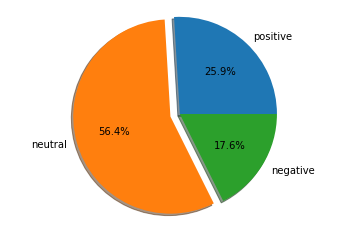

General Sentiment Analysis of Batting Cluster Comments


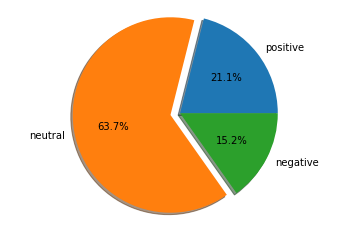

General Sentiment Analysis of Bowling Cluster Comments


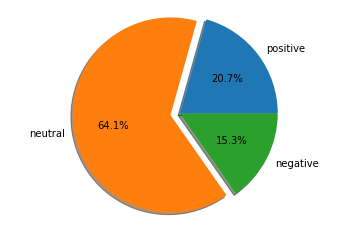

General Sentiment Analysis of Fielding Cluster Comments


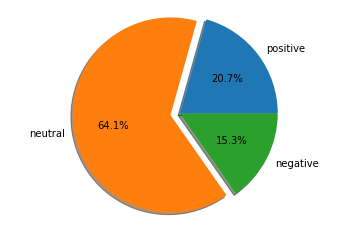

In [186]:
import matplotlib.pyplot as plt
labels = tuple(summary.keys())
sizes = list(summary.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
print("General Sentiment Analysis of Comments")
plt.show()

labels = tuple(bat.keys())
sizes = list(bat.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
print("General Sentiment Analysis of Batting Cluster Comments")
plt.show()

labels = tuple(bow.keys())
sizes = list(bow.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
print("General Sentiment Analysis of Bowling Cluster Comments")
plt.show()

labels = tuple(fid.keys())
sizes = list(fid.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
print("General Sentiment Analysis of Fielding Cluster Comments")
plt.show()